## Importing all the required libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from itertools import chain
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

## Reading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dir = "/content/drive/MyDrive/295A project/Data/Food/data/"
Food_Ratings = pd.read_csv(dir+'RAW_interactions.csv')
Food_Recipes = pd.read_csv(dir+'RAW_recipes.csv')
Food_pp_users = pd.read_csv(dir+'PP_users.csv')
Food_pp_recipes = pd.read_csv(dir+'PP_recipes.csv')
Food_interactions_validation = pd.read_csv(dir+'interactions_validation.csv')
Food_interactions_train = pd.read_csv(dir+'interactions_train.csv')
Food_interactions_test = pd.read_csv(dir+'interactions_test.csv')

## Preprocessing/EDA

In [5]:
Food_Recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [6]:
Food_Ratings.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [7]:
df=Food_Ratings

In [8]:
df['recipe_id'].nunique(),df['user_id'].nunique(),df['rating'].count()

(231637, 226570, 1132367)

In [9]:
df['rating'].max(),df['rating'].min(),round(df['rating'].sum()/df['rating'].count(),2)

(5, 0, 4.41)

In [10]:
df['rating'].std(),df['rating'].var()

(1.2647518406059137, 1.5995972183160467)

In [11]:
from pandas._libs.missing import NA
sparsity = (df == 0 | df.isna()).any().astype(int).sum() / df.size
sparsity

1.7662118376815997e-07

In [12]:
Food_Ratings.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [13]:
Food_Recipes.isna().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [14]:
Food_Recipes.dropna(inplace=True)

In [15]:
Food_Recipes.isna().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64

In [16]:
# WordCloud of the decription column

In [17]:
allwords = " ".join(Food_Recipes["description"])

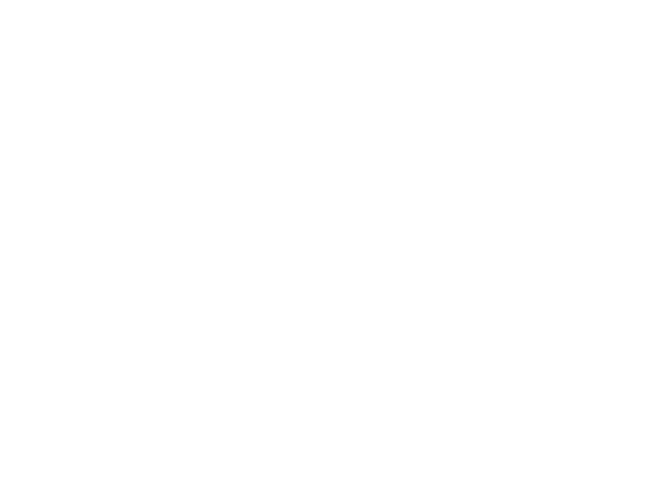

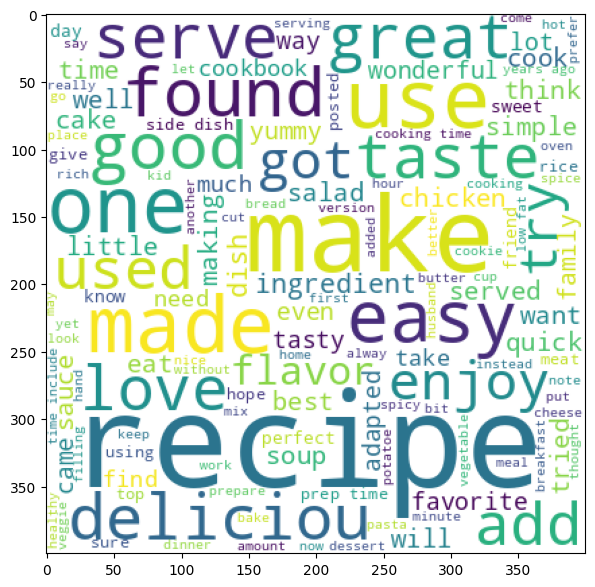

In [18]:
wordcloud = WordCloud(width = 400, height = 400,
                    background_color ='white',
                    stopwords = set(STOPWORDS),
                    min_font_size = 10).generate(allwords)

plt.axis("off")
plt.tight_layout(pad = 0)

plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud)

plt.show()

## Importing the libraries required for Embedding and Neural Networks

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Embedding, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras
from keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from keras import regularizers
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [21]:
Food_Recipes["description"].isna().sum()

0

In [22]:
vectorizer = TfidfVectorizer(max_features = 1000)

# fit the vectorizer on the documents to create the term-document matrix
X = vectorizer.fit_transform(Food_Recipes["description"])

# create a TruncatedSVD instance with the desired number of components
lsa = TruncatedSVD(n_components=100)

# fit the LSA model on the term-document matrix to generate embeddings
embeddings = lsa.fit_transform(X)
embeddings.shape

(226657, 100)

In [23]:
embeddings = pd.DataFrame(embeddings)
Food_Recipes2 = pd.concat([Food_Recipes, embeddings], axis=1)

In [24]:
Food_Recipes2.dropna(inplace= True)

In [25]:
Food_Recipes2.id = Food_Recipes2.id.astype('int')

### Merging two datasets raw_interactions and raw_recipes on recipe_id for embedding the description

In [26]:
FoodRatings_merge = pd.merge(Food_Ratings,Food_Recipes2.rename(columns = {'id':'recipe_id'}),on='recipe_id',how='left')
FoodRatings_merge.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,...,90,91,92,93,94,95,96,97,98,99
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495.0,1533.0,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",...,-0.091021,-0.028775,-0.029107,-0.017392,0.001140,-0.003665,-0.008217,-0.054048,0.015771,0.033705
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495.0,1533.0,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",...,-0.091021,-0.028775,-0.029107,-0.017392,0.001140,-0.003665,-0.008217,-0.054048,0.015771,0.033705
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10.0,64342.0,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",...,-0.039695,-0.049580,-0.055401,0.033390,-0.029356,-0.006112,-0.084044,-0.023843,0.042601,0.052769
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10.0,64342.0,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",...,-0.039695,-0.049580,-0.055401,0.033390,-0.029356,-0.006112,-0.084044,-0.023843,0.042601,0.052769


In [27]:
FoodRatings_merge.isna().sum()

user_id          0
recipe_id        0
date             0
rating           0
review         169
             ...  
95           49358
96           49358
97           49358
98           49358
99           49358
Length: 116, dtype: int64

In [28]:
Food_Ratings.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

### Dropping all the unnecessary columns from the merged dataframe

In [29]:
Food_Ratings_final = FoodRatings_merge.drop(['description','review','date', 'name', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'ingredients', 'n_ingredients'], axis=1)

In [30]:
Food_Ratings_final.isna().sum()

user_id          0
recipe_id        0
rating           0
0            49358
1            49358
             ...  
95           49358
96           49358
97           49358
98           49358
99           49358
Length: 103, dtype: int64

In [31]:
# Dropping the rows that have nan values
Food_Ratings_final.dropna(inplace=True)

In [32]:
Food_Ratings_final.isna().sum()

user_id      0
recipe_id    0
rating       0
0            0
1            0
            ..
95           0
96           0
97           0
98           0
99           0
Length: 103, dtype: int64

In [33]:
# Converting the user_id and rating_id into categorical so that it can be label encoded.

In [34]:
Food_Ratings_final['user_id'] = pd.Categorical(Food_Ratings_final['user_id'])
Food_user = Food_Ratings_final['user_id'].cat.codes
Food_Ratings_final['recipe_id'] = pd.Categorical(Food_Ratings_final['recipe_id'])
Food_recipe = Food_Ratings_final['recipe_id'].cat.codes
training_output = Food_Ratings_final['rating']

In [35]:
Food_Ratings_final.drop(columns = ['user_id','recipe_id','rating'],inplace=True)

In [36]:
user_id = Food_user.max()
recipe_id = Food_recipe.max()
recipe_input_dim = 1
user_input_dim = 1
Food_Ratings_final_dim = Food_Ratings_final.shape[1]

recipe_id,user_id,recipe_input_dim,user_input_dim,Food_Ratings_final_dim

(221760, 219393, 1, 1, 100)

In [37]:
Food_Ratings_final_dim

100

In [38]:
Food_user.max(),Food_recipe.max()

(219393, 221760)

In [39]:
#Embedding layer for users
users_input = Input(shape=(user_input_dim,))
embedding_layer_users = Embedding(user_id+1 ,10, embeddings_regularizer=regularizers.L2(0))(users_input)#Embedding layer
embedding_output_users = Flatten()(embedding_layer_users)

#Embedding layer for recipe
recipe_input = Input(shape=(recipe_input_dim,))
embedding_layer_recipe = Embedding(recipe_id+1 ,10, embeddings_regularizer=regularizers.L2(0))(recipe_input)#Embedding layer
embedding_output_recipe = Flatten()(embedding_layer_recipe)


# #Embedding layer for Final_Ratings that ie., the metadata
meta_input = Input(shape=(Food_Ratings_final_dim,), name='metadata_input')#1st Input Layer
dense_layer = Dense(64, activation='relu')(meta_input)
metadata_embedding = Dense(10, activation='relu',name='metadata_embedding')(dense_layer)

#Concatination and Dense layer
Merged_Embeddings = Concatenate()([embedding_output_recipe, embedding_output_users,metadata_embedding])
hidden_layer = Dense(32, activation='relu', kernel_regularizer=regularizers.L2(0))(Merged_Embeddings)

output_layer = Dense(1, kernel_initializer='lecun_uniform')(hidden_layer)

model = tf.keras.Model([recipe_input, users_input,meta_input], output_layer) #

In [40]:
# Model Optimizer
optimizer = Adam(lr=1e-3, epsilon = 1e-7, amsgrad=True)
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 metadata_input (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 10)                2217610   ['input_2[0][0]']         

In [41]:
Food_Ratings_final

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.322326,-0.147668,0.130167,-0.113771,-0.008254,0.183741,0.085041,-0.065189,0.061949,0.093825,...,-0.091021,-0.028775,-0.029107,-0.017392,0.001140,-0.003665,-0.008217,-0.054048,0.015771,0.033705
1,0.322326,-0.147668,0.130167,-0.113771,-0.008254,0.183741,0.085041,-0.065189,0.061949,0.093825,...,-0.091021,-0.028775,-0.029107,-0.017392,0.001140,-0.003665,-0.008217,-0.054048,0.015771,0.033705
3,0.393132,-0.111766,0.169232,-0.020884,-0.051137,-0.064105,0.070630,-0.104113,-0.052131,-0.005264,...,-0.039695,-0.049580,-0.055401,0.033390,-0.029356,-0.006112,-0.084044,-0.023843,0.042601,0.052769
4,0.393132,-0.111766,0.169232,-0.020884,-0.051137,-0.064105,0.070630,-0.104113,-0.052131,-0.005264,...,-0.039695,-0.049580,-0.055401,0.033390,-0.029356,-0.006112,-0.084044,-0.023843,0.042601,0.052769
5,0.274319,0.046590,-0.061614,-0.131056,0.035339,-0.051266,-0.053946,0.007389,-0.064623,-0.073656,...,0.005223,0.067777,-0.136232,0.022788,0.006052,-0.001089,-0.058735,-0.006604,0.014729,-0.020073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132362,0.154672,-0.050240,-0.058877,-0.102131,-0.050434,0.109075,0.008104,-0.044601,-0.031799,-0.003228,...,-0.086300,-0.068518,-0.035452,0.028747,0.028224,0.006287,-0.021128,0.052764,-0.001298,-0.083306
1132363,0.204890,0.004215,-0.036229,-0.071911,0.009782,-0.060176,-0.044296,0.095721,-0.053048,-0.106911,...,0.038979,0.017321,-0.003239,0.001685,0.004931,-0.013089,-0.005692,-0.035677,-0.027296,0.003963
1132364,0.137059,-0.076023,-0.132178,0.183093,0.087165,-0.027217,0.111322,0.057237,0.063213,-0.147901,...,-0.030688,0.003692,-0.003783,0.022287,0.006049,-0.001211,-0.060025,0.027328,0.010387,-0.030286
1132365,0.137059,-0.076023,-0.132178,0.183093,0.087165,-0.027217,0.111322,0.057237,0.063213,-0.147901,...,-0.030688,0.003692,-0.003783,0.022287,0.006049,-0.001211,-0.060025,0.027328,0.010387,-0.030286


In [42]:
# Splitting the data in 4:1 for train-test
x=800000

In [43]:
# Fit the model to the data

Final_list = [Food_recipe[:x], Food_user[:x],Food_Ratings_final[:x]]

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

Neural_nets = model.fit(
  Final_list, training_output, batch_size=256, epochs=10,
  verbose=1, callbacks = [early_stopping], validation_split=0.2
)

Epoch 1/10
2500/2500 [==============================] - 91s 36ms/step - loss: 1.8279 - root_mean_squared_error: 1.3520 - val_loss: 1.4864 - val_root_mean_squared_error: 1.2192
Epoch 2/10
2500/2500 [==============================] - 91s 36ms/step - loss: 1.0188 - root_mean_squared_error: 1.0094 - val_loss: 1.6144 - val_root_mean_squared_error: 1.2706
Epoch 3/10
2500/2500 [==============================] - 90s 36ms/step - loss: 0.7110 - root_mean_squared_error: 0.8432 - val_loss: 1.6564 - val_root_mean_squared_error: 1.2870
Epoch 4/10
2500/2500 [==============================] - 88s 35ms/step - loss: 0.6103 - root_mean_squared_error: 0.7812 - val_loss: 1.7840 - val_root_mean_squared_error: 1.3356


In [44]:
Predictions = model.predict([Food_recipe[x:],Food_user[x:],Food_Ratings_final[x:]])

8845/8845 [==============================] - 9s 1ms/step


In [45]:
mean_squared_error(Predictions,training_output[x:])

1.7556517300733838

In [46]:
mean_absolute_error(Predictions,training_output[x:])

0.9229628761877643

In [65]:
import math
preds = []
for i in Predictions:
  preds.append(round(i[0]))

In [66]:
print(len(preds))

283009


In [55]:
np.array(training_output)

array([4, 5, 5, ..., 5, 4, 5])

In [67]:
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(np.array(training_output[x:]), preds, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.21549248386961337
Recall: 0.18982265716094762
F1 Score: 0.16658170687885887


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save('/content/drive/MyDrive/295A project/Data/Food Data/data/NCF_best.pickle')